In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
import json

TWEETS_DATA_PATH = 'tweet_mining.json'

results = []
with open(TWEETS_DATA_PATH) as tweets_file:
    for tweet_line in tweets_file:
        try:
            status = json.loads(tweet_line)
            results.append(status)
        except ValueError:
            pass
    
print(len(results))

1111


In [22]:
import pandas

#create a dataframe
statuses = pandas.DataFrame()

# store the text values
statuses['text'] = [status['text'] for status in results]

#store langguage values
statuses['lang'] = [status['lang'] for status in results]

statuses['country'] = [status['place']['country'] if status['place'] else "N/A" for status in results]

print(statuses.head())


                                                text lang country
0  https://t.co/JVoq27OHqt ㅋㅋㅋ 선 정리 안 된 건 이 섬나라 사...   ko     N/A
1  【立教生】立教大学周辺のお得なランチ情報を掲載しております！お昼のお店選びの参考にしてくださ...   ja     N/A
2  #黒羽快斗愛され\n#快斗愛されおすすめ作品\n\nめちゃくちゃほんのりとした幸せになれる快...   ja     N/A
3           All of them 😂😭😂😭 https://t.co/nwjzGdkUk1   en     N/A
4                            https://t.co/piA0IQZd5N  und     N/A


In [23]:
# get each tweet language and count of its apearance
tweets_by_lang = statuses['lang'].value_counts()

tweets_by_country = statuses['country'].value_counts()

print(tweets_by_lang.head())
print(tweets_by_country.head())

en     318
und    281
ja     256
es      55
fr      40
Name: lang, dtype: int64
N/A        1110
Uruguay       1
Name: country, dtype: int64


<IPython.core.display.Javascript object>


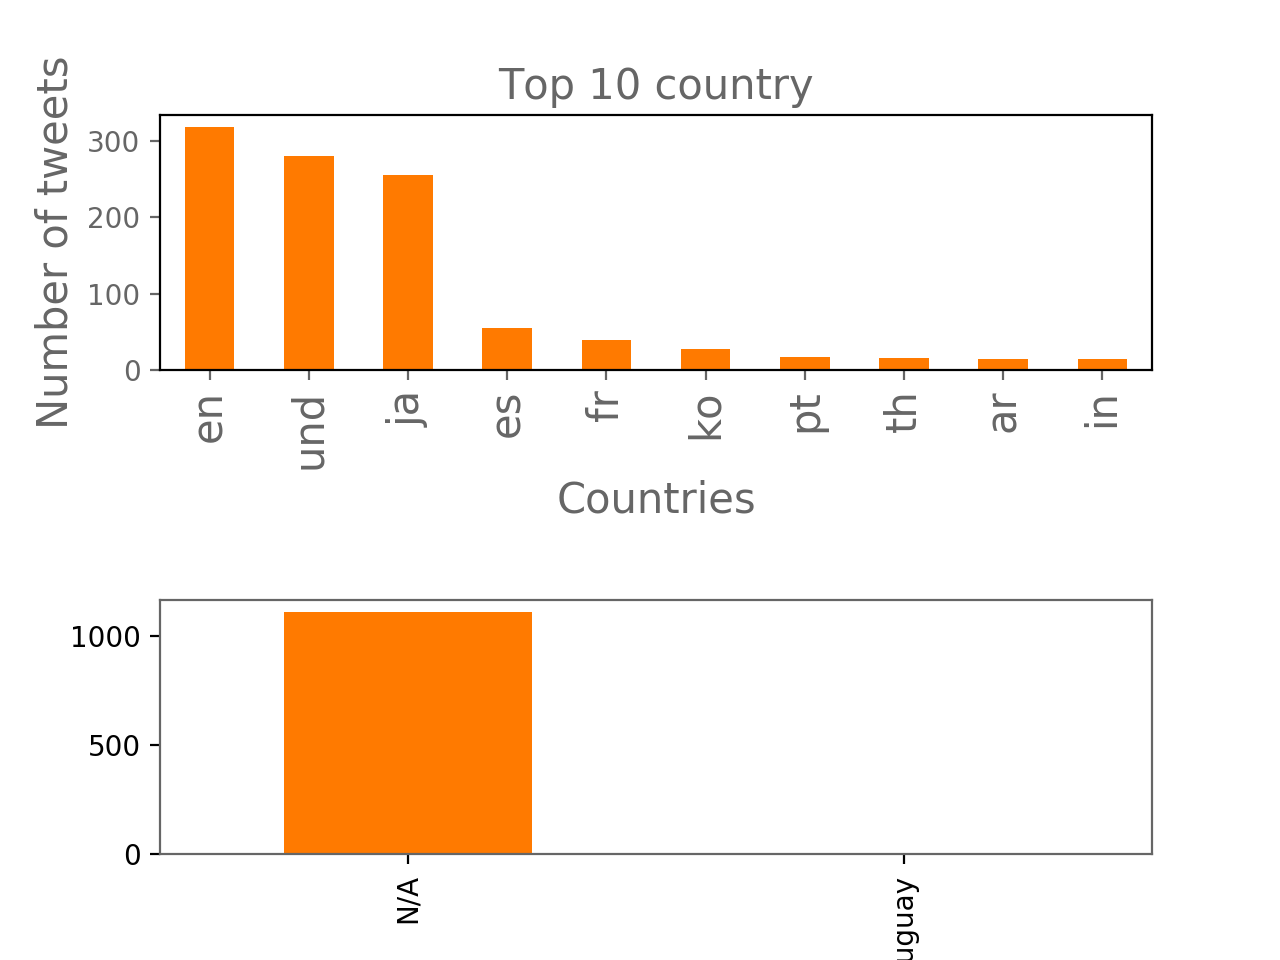

In [24]:
#creat drawing space
fig = plt.figure()
fig.subplots_adjust(hspace=.9)

#prepare to plot two charts on the same figure
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#style the axis
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('Tweet languages', fontsize=15)
ax1.set_ylabel('Number of tweets', fontsize=15)
ax1.xaxis.label.set_color('#666666')
ax1.yaxis.label.set_color('#666666')
ax1.tick_params(axis='x', colors='#666666')
ax1.tick_params(axis='y', colors='#666666')

# style the title
ax1.set_title('Top 10 languages', fontsize=15, color='#666666')

# Plot the top 10 tweet languages
tweets_by_lang[:10].plot(ax=ax1, kind='bar', color='#FF7A00')

# color the spines
for spine in ax2.spines.values():
    spine.set_edgecolor('#666666')
    
# Second subplot

#style the axis
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('Countries', fontsize=15)
ax1.set_ylabel('Number of tweets', fontsize=15)
ax1.xaxis.label.set_color('#666666')
ax1.yaxis.label.set_color('#666666')
ax1.tick_params(axis='x', colors='#666666')
ax1.tick_params(axis='y', colors='#666666')

# style the title
ax1.set_title('Top 10 country', fontsize=15, color='#666666')

tweets_by_country[:10].plot(ax=ax2, kind='bar', color='#FF7A00')

# color the spines
for spine in ax2.spines.values():
    spine.set_edgecolor('#666666')

plt.show()